In [1]:
is_colab = True
if is_colab:
    data_dir = 'https://raw.githubusercontent.com/utm529f/sukkiri-ml-codes-polars/main/datafiles'
else:
    data_dir = '../datafiles'

In [2]:
import polars as pl
df = pl.read_csv(f'{data_dir}/Wholesale.csv')
df.head(3)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
i64,i64,i64,i64,i64,i64,i64,i64
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844


In [3]:
df.null_count()

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


In [4]:
df = df.drop(['Channel', 'Region'])

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pl.DataFrame(sc_df, schema=df.columns)

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=3, random_state=0)

In [8]:
# モデルに学習させる
model.fit(sc_df)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [9]:
model.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [10]:
sc_df = sc_df.with_columns(pl.Series(model.labels_).alias('cluster'))
sc_df.head(2)

Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
f64,f64,f64,f64,f64,f64,i32
0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2


In [11]:
sc_df.group_by('cluster').mean().sort(by='cluster')

cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
i32,f64,f64,f64,f64,f64,f64
0,1.523225,-0.136629,-0.245823,1.038595,-0.409281,0.305114
1,-0.242638,1.943918,2.138295,-0.042127,2.076593,0.6462
2,-0.305934,-0.247152,-0.250504,-0.226214,-0.20514,-0.160539


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def barplot_groupby_cluster_mean(df):
    cluster_mean = df.group_by('cluster').mean()
    clusters = cluster_mean["cluster"].sort().to_numpy()
    features = [col for col in df.columns if col != "cluster"]

    # 棒の位置の計算
    x = np.arange(len(clusters))  # クラスターの位置 (0, 1, 2)
    total_width = 0.8             # 棒全体の幅
    n_features = len(features)    # 項目数 (6つ)
    width = total_width / n_features # 1本あたりの幅

    fig, ax = plt.subplots(figsize=(10, 6))

    # 各項目ごとに棒を描画
    for i, feature in enumerate(features):
        # 各棒の位置をずらす (中心から左に振って、順に右へ)
        offset = (i - (n_features - 1) / 2) * width
        ax.bar(x + offset, cluster_mean[feature].to_numpy(), width, label=feature)

    ax.set_xlabel("cluster")
    ax.set_xticks(x)
    ax.set_xticklabels(clusters)
    ax.axhline(0, color='black', linewidth=0.8) # 0の線を見やすく
    ax.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

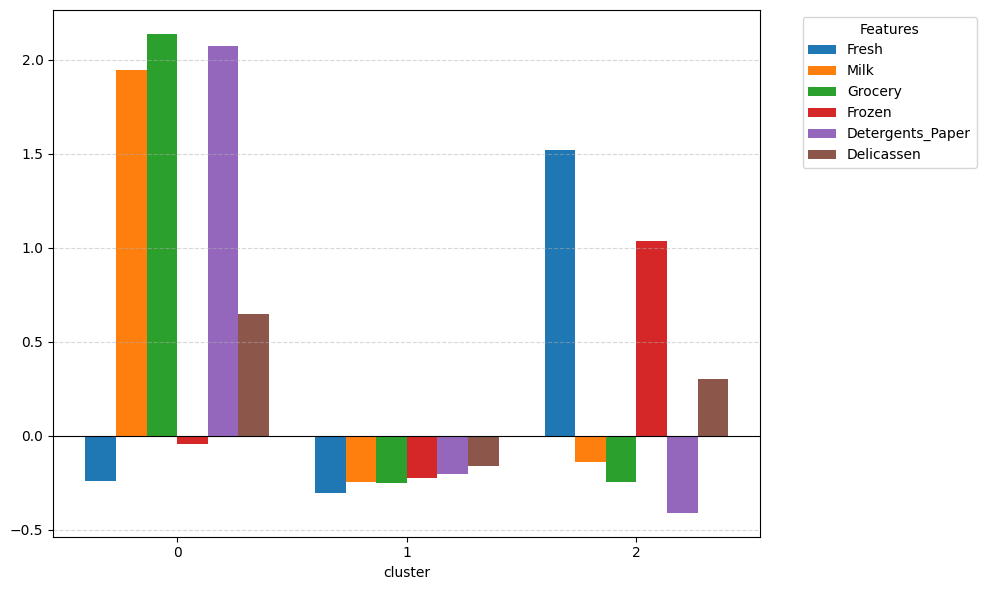

In [13]:
barplot_groupby_cluster_mean(sc_df)

In [14]:
sse_list = []
# クラスタ数2～30でSSEを調べる
for n in range(2, 31):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(sc_df)
    sse = model.inertia_ # SSEの計算
    sse_list.append(sse)
sse_list

[2184.152078787454,
 1650.7701877708016,
 1358.6826733312396,
 1084.9880771922897,
 976.7895922045104,
 873.0879648315711,
 819.252146194169,
 718.6803804619203,
 673.67919434593,
 633.9487005583328,
 614.040593822607,
 555.1324949163233,
 527.8900171008175,
 476.33162361483915,
 440.4708197752957,
 420.23624717051206,
 399.85121407845486,
 388.6095198127215,
 359.93689445935956,
 337.7321758899184,
 308.52814956813336,
 292.6488385554654,
 282.82662377587695,
 272.42445313368137,
 262.87268751542445,
 270.67237206393264,
 255.7318719698799,
 237.71231575184248,
 230.8042044801083]

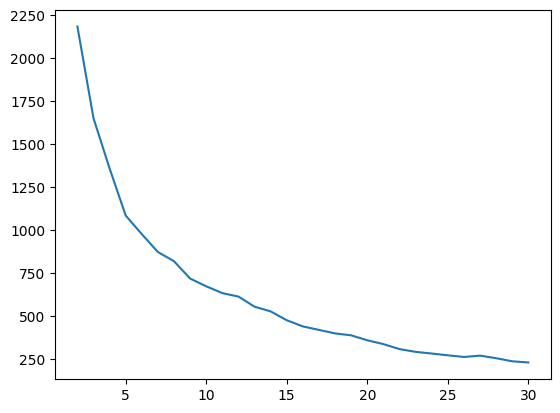

In [15]:
num = range(2, 31) # range関数で2～30の整数列を作る
plt.plot(num, sse_list)

In [16]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(sc_df)
sc_df = sc_df.with_columns(pl.Series(model.labels_).alias('cluster'))
sc_df.write_csv('clustered_Wholesale.csv')

In [17]:
import polars as pl
df = pl.read_csv(f'{data_dir}/Survived.csv')

In [18]:
df = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked'])

In [19]:
df = df.fill_null(strategy='mean')

In [20]:
df = df.to_dummies(['Sex'], drop_first = True)

c:\Users\Isao\work\python\kaggle\.venv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-2.803468542890021 > -71.411462536549095). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
c:\Users\Isao\work\python\kaggle\.venv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-5.887063928937566 > -76.227546496255997). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
c:\Users\Isao\work\python\kaggle\.venv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.750726282305440 > -77.016434532978309). You may want to try with a higher value of support_fraction (current 

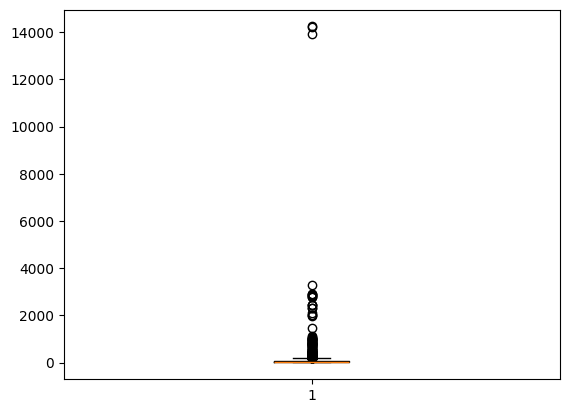

In [21]:
from sklearn.covariance import MinCovDet

mcd = MinCovDet(random_state=0)
mcd.fit(df)

maha_dis = mcd.mahalanobis(df)
tmp = pl.Series(maha_dis)
plt.boxplot(tmp)
plt.show()

In [22]:
df = (df
    .with_columns(tmp.alias('mahalanobis'))
    .filter(pl.col('mahalanobis')>10000)
    .drop('mahalanobis')
)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)

df2 = pl.DataFrame(sc_df, schema=df.columns)

In [24]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)
model.fit(df2)

df2 = df2.with_columns(pl.Series(model.labels_).alias('cluster'))

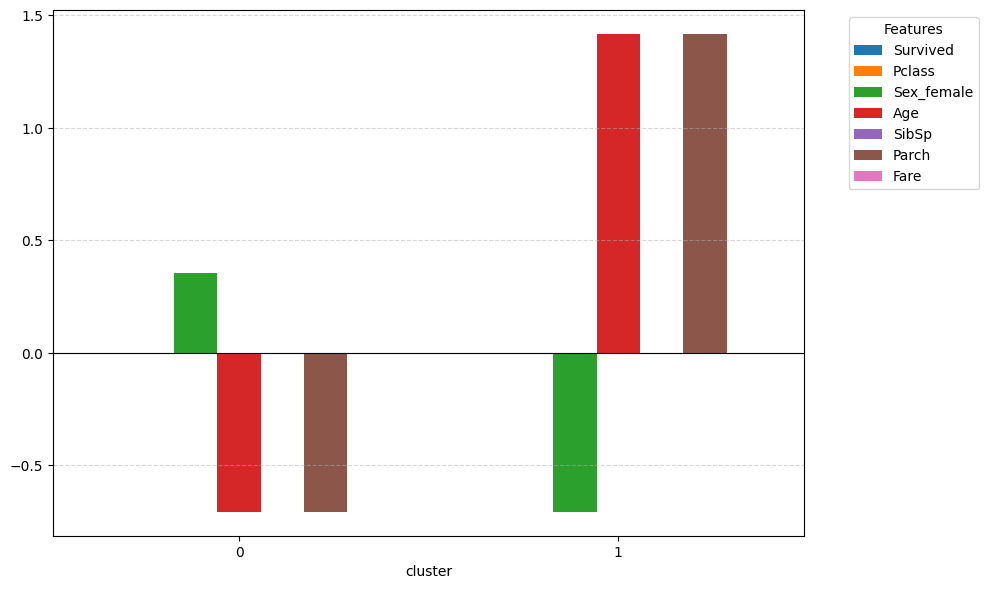

In [25]:
barplot_groupby_cluster_mean(df2)